<img src = "../../Data/bgsedsc_0.jpg">
$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bpi}{\boldsymbol \pi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bS}{\boldsymbol{\Sigma}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\hy}{\hat{y}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

# Project: Linear Classification

## Programming project: forest cover classification

In this project, you have to predict the class of forest cover (the predominant kind of tree cover) from strictly cartographic and environment variables.

The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains categorical data for qualitative independent variables (wilderness areas and soil types).

You have further details on the data at *covertype.info* file and at https://archive.ics.uci.edu/ml/datasets/Covertype

Be aware that the final dataset has been slighly modified from the original source data.

As performance metric, you can use *AUC* in the binary classification case. For multi-class classification, check as well the confussion matrix and estimate the misclassification probabilities of different classes(check *metrics.confusion_matrix* and *metrics.classification_report* in *sklearn*).

+ Using *MultiClass_Train.csv* file build a predictive model for *Cover_Type* .
+ Try a first a binary classification to predict class #7 (Krummholz, https://en.wikipedia.org/wiki/Krummholz), which is a rare valuable habitat. After that, then try multi-variate classification to predict all classes.
+ For this analysis there is an extra test dataset. Once your code is submitted we will run a competition to see how you score in the test data. Hence have prepared also the necessary script to compute the accuracy estimate on the test data once released.

You can follow those **steps** in your first implementation:
1. *Explore* and understand the dataset. 
2. Create *dummy variables* for relevant categorical features
3. Reformat the Class_type variable into a binary one, being class #7 the target variable versus the others.
4. *Build* an initial binary model for class #7 versus the other ones and test it on the same input data. 
5. Assess expected accuracy using *cross-validation*
6. Report which variable impacts more on results 
7. Try to improve it using methods to tackle class imbalance.
8. Repeat 4., 5., 6. and 7. now with a multi-class model (EXTENDED PROJECT)
9. Produce .csv for kaggle testing 


## Main criteria for grading
From more to less important (the weighting of these components will vary between the in-class and extended projects):
+ Code runs
+ Data preparation
+ Logistic Regression Models(s) have been used
+ Cover Type prediction made
+ Accuracy of predictions for test set (kaggle)
+ Class imbalance management
+ Hyperparameter optimization

## **Step 0: Load data**

In [ ]:
#Step 0: Load data
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/My Drive/cml2_inclass2')

## **Step 1: Read and explore data**

In [ ]:
# Step 1: Read and explore data
data = pd.read_csv('MultiClass_Train.csv')
print(data.columns)

Index(['Index', 'Elevation', 'Aspect', 'Slope', 'Horiz_dist_hydro',
       'Vertical_dist_hydro', 'Horiz_dist_roadways', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm', 'Horiz_dist_firepoints',
       'Cover_Type', 'Wilderness_Area', 'Soil_Type'],
      dtype='object')


In [ ]:
data_test = pd.read_csv('MultiClass_Test.csv')
data_test.shape

(13073, 13)

In [ ]:
data.head(10)
data['Cover_Type'].value_counts()

2    29690
1    22199
3     3802
7     2163
6     1865
5      992
4      295
Name: Cover_Type, dtype: int64

In [ ]:
#Check for missing values
print(data.isnull().sum())
print(data_test.isnull().sum())

Index                    0
Elevation                0
Aspect                   0
Slope                    0
Horiz_dist_hydro         0
Vertical_dist_hydro      0
Horiz_dist_roadways      0
Hillshade_9am            0
Hillshade_Noon           0
Hillshade_3pm            0
Horiz_dist_firepoints    0
Cover_Type               0
Wilderness_Area          0
Soil_Type                0
dtype: int64
Index                    0
Elevation                0
Aspect                   0
Slope                    0
Horiz_dist_hydro         0
Vertical_dist_hydro      0
Horiz_dist_roadways      0
Hillshade_9am            0
Hillshade_Noon           0
Hillshade_3pm            0
Horiz_dist_firepoints    0
Wilderness_Area          0
Soil_Type                0
dtype: int64


## **Step 2: Create dummies for relevant features**

Step 2: I only make dummies for "Wilderness_Area" (and not "Soil_Type") as Kaggle submissions shows this is a better fit. I presume this might be due to loss of degrees of freedom with dummies for "Soil_Type" as we get around 40 dummies here.

In [ ]:
# Step 2: Create dummies for relevant features
data = pd.get_dummies(data, prefix=['wild_area'], columns=['Wilderness_Area'], drop_first = True)
#data = pd.get_dummies(data, prefix=['soil_'], columns=['Soil_Type'], drop_first = True)
data.head(10)

,Index,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,Cover_Type,Soil_Type,wild_area_2,wild_area_3,wild_area_4
0,0,3202,34,10,0,0,2760,219,218,134,1734,1,38,0,1,0
1,1,3113,251,13,192,40,5600,191,249,195,2555,2,22,0,0,0
2,2,2801,77,9,510,17,1728,232,223,122,1087,2,12,0,0,0
3,3,3165,82,9,319,56,4890,233,225,124,1452,1,29,0,0,0
4,4,3048,333,11,124,31,2823,196,226,170,666,1,23,0,0,0
5,5,2347,31,16,242,140,216,214,203,120,1425,3,2,0,0,1
6,6,3381,56,22,376,147,1919,228,187,81,2059,1,40,0,0,0
7,7,2290,86,24,30,0,1325,246,192,61,830,4,17,0,0,1
8,8,3051,75,21,150,0,1003,240,194,74,1733,1,22,0,1,0
9,9,2978,294,18,228,29,5730,167,233,205,1920,1,29,0,0,0


In [ ]:
data_test = pd.get_dummies(data_test, prefix=['wild_area'], columns=['Wilderness_Area'], drop_first = True)
#data_test = pd.get_dummies(data_test, prefix=['soil_'], columns=['Soil_Type'], drop_first = True)
data_test.shape

(13073, 15)

## **Step 3: Reformat the data to have an binary class target (class #7 is the target to predict)**

In [ ]:
# Step 3: Reformat the data to have an binary class target (class #7 is the target to predict)
data['Cover_Type_new'] = [1 if q == 7 else 0 for q in data['Cover_Type'] ]
#data['Cover_Type_new'] = [1 if q == 7 else 0 for q in data.Cover_Type' ]
data = data.drop('Cover_Type', axis = 1)
data['Cover_Type_new'].value_counts()

0    58843
1     2163
Name: Cover_Type_new, dtype: int64

So we seem to have class imbalance as only roughly 3.5% are class #7

In [ ]:
data.columns
data.head(10)

,Index,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,Soil_Type,wild_area_2,wild_area_3,wild_area_4,Cover_Type_new
0,0,3202,34,10,0,0,2760,219,218,134,1734,38,0,1,0,0
1,1,3113,251,13,192,40,5600,191,249,195,2555,22,0,0,0,0
2,2,2801,77,9,510,17,1728,232,223,122,1087,12,0,0,0,0
3,3,3165,82,9,319,56,4890,233,225,124,1452,29,0,0,0,0
4,4,3048,333,11,124,31,2823,196,226,170,666,23,0,0,0,0
5,5,2347,31,16,242,140,216,214,203,120,1425,2,0,0,1,0
6,6,3381,56,22,376,147,1919,228,187,81,2059,40,0,0,0,0
7,7,2290,86,24,30,0,1325,246,192,61,830,17,0,0,1,0
8,8,3051,75,21,150,0,1003,240,194,74,1733,22,0,1,0,0
9,9,2978,294,18,228,29,5730,167,233,205,1920,29,0,0,0,0


## **Step 4: Build a binary model to predict class #7**

In [ ]:
# Step 4: Build a binary model to predict class #7
F = data.drop('Cover_Type_new', axis = 1)
y = data['Cover_Type_new']


In [ ]:
#from sklearn.linear_model import LogisticRegression

#Instantiate
logist = LogisticRegression(penalty='l2', C=100.0, 
                           fit_intercept=True, 
                           solver='liblinear', max_iter=500)

#Fit
logist.fit(F,y)

#Predicted classes
logist.predict(F)

#Predicted probabilities
p_hat_pred = logist.predict_proba(F)
print(p_hat_pred[:,1])


[1.59266746e-01 2.08911077e-03 2.75620283e-05 ... 4.78849328e-03
 1.65077291e-06 1.82301775e-06]


## **Step 5: Assess expected accuracy: AUC**

In [ ]:
# Step 5: Assess expected accuracy: AUC
from sklearn import metrics

test_hat = logist.predict_proba(F)
test_hat_preds = test_hat[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, test_hat_preds)
metrics.auc(fpr, tpr)

0.961908291203508

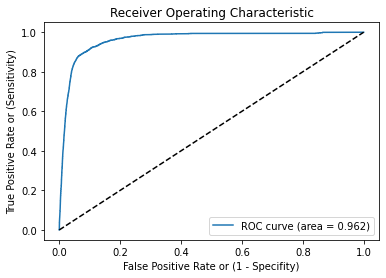

In [ ]:
#Lets also create a AUC/ROC plot
import matplotlib.pyplot as plt

#Create AUC plot
fpr, tpr, threshold = metrics.roc_curve(y, test_hat_preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)

# Refining plot
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')


#Inspect figure
plt.show()

The curve looks pretty nice.

## **Step 6: Report variable impact**

In [ ]:
# Step 6: Report variable impact
print(abs(logist.coef_))

[[1.03698336e-06 1.01712255e-02 1.15249447e-03 2.27979400e-01
  1.23726757e-03 1.33572968e-03 1.28560349e-05 2.27227848e-01
  1.69726771e-01 1.94343871e-01 1.55056523e-04 1.68581258e-01
  2.12526300e-02 1.10605827e-01 2.25679005e-04]]


In [ ]:
## Your code here (click on the window and type 'b' if you want to split in more than one code window)
#import pandas as pd


# Step 7: Try to improve it using methods to tackle class imbalance.


# Step 8: Repeat 4., 5., 6. and 7. now with a multi-class model (EXTENDED PROJECT)




### Kaggle Predictions Submissions

Once you have produced testset predictions you can submit these to <i> kaggle </i> in order to see how your model performs. 

The following code provides an example of generating a <i> .csv </i> file to submit to kaggle
1) create a pandas dataframe with two columns, one with the test set "Index"'s and the other with your probability of the "Covert_Type" being class 7

2) use the <i> .to_csv </i> pandas method to create a csv file. The <i> index = False </i> is important to ensure the <i> .csv </i> is in the format kaggle expects 

In [ ]:
# Dataframe for submission
p_hat_pred_test = logist.predict_proba(data_test)
kaggle = pd.DataFrame(data_test['Index'])
pred_df = pd.DataFrame(p_hat_pred_test[:,1])
kaggle['p_hat_pred_test'] = pred_df
kaggle

,Index,p_hat_pred_test
0,61006,9.959232e-03
1,61007,9.205196e-06
2,61008,1.704510e-01
3,61009,1.817435e-07
4,61010,8.995285e-04
...,...,...
13068,74074,2.110275e-03
13069,74075,8.104978e-05
13070,74076,6.165053e-03
13071,74077,7.551386e-04


In [ ]:
# Step 9: Produce .csv for kaggle testing 
#test_predictions_submit = pd.DataFrame({"Index": forest_cover_test["Index"], "Cover_Type": p_hat_pred[:,1]})
test_predictions_submit = pd.DataFrame({"Index": kaggle["Index"], "Cover_Type": kaggle['p_hat_pred_test']})
test_predictions_submit.to_csv("test_LogReg_predictions_submit.csv", index = False)